In [1]:
import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner

In [2]:
cust_json = "customer_classes.json"
today_customer = 50
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"

arms = settings.prices
environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)
clairvoyant_arms, clairvoyant_reward, exp_c= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [==============================] 99.6%
 [2, 0, 0, 0, 0] 2000.0 40.0


In [3]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 50
NUM_ITERATION = 5

# TODO: we should put the customer argument as optional,since greedy learner has no need of customer(no simulation)
rewards_iterations = []
for i in range(NUM_ITERATION):
    gr_learner = GreedyLearner(n_arms, n_products, customer, graph_json, arms)

    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = gr_learner.select_superarm()
        report = environment.round(super_arm)
        gr_learner.update(super_arm.copy(), report)
        prices = [arms[p][a] for p, a in enumerate(super_arm)]
    rewards = gr_learner.get_rewards()
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

loading: [========================      ] 80.0%

(5, 50)

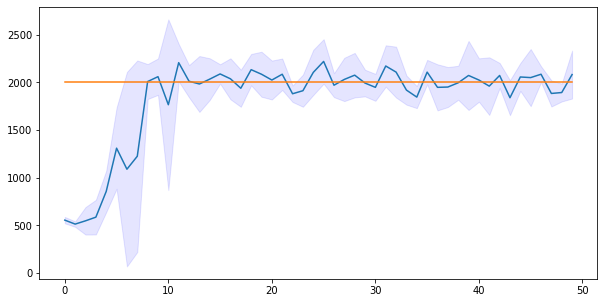

In [4]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
plt.plot(range(len(rewards)), [clairvoyant_reward] * len(rewards))
plt.show()

In [5]:
aggregate_customer = Customer(
    0,
    0,
    environment.get_aggregate_alphas(),
    environment.get_aggregate_num_prods_distribution(),
    environment.get_aggregate_click_graph()
    )


In [6]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb1_learner = UCBLearner(n_arms, n_products, aggregate_customer, graph_json, arms)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb1_learner.select_superarm()
        report = environment.round(super_arm)
        ucb1_learner.update(super_arm.copy(), report)
    rewards = ucb1_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%

C:\Users\mvcim\OneDrive\Desktop\policy compression\OLA_project\Code\UCBLearner.py:31: RuntimeWarning: invalid value encountered in double_scalars
  self.means[product, arm] = (self.means[product, arm] * self.seen[product, arm] + bought[product]) / (tot_seen[product, arm])


TypeError: object of type 'NoneType' has no len()

In [ ]:
ucb1_learner.estimate_conversion_rates()

In [ ]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

In [7]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner = TSLearner(n_arms, n_products, aggregate_customer, graph_json, arms)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ts_learner.select_superarm()
        report = environment.round(super_arm)
        ts_learner.update(super_arm.copy(), report)
    rewards = ts_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape


Iteration # 1
loading: [========================      ] 80.0%
Iteration # 2
loading: [========================      ] 80.0%
Iteration # 3
loading: [========================      ] 80.0%
Iteration # 4
loading: [========================      ] 80.0%
Iteration # 5
loading: [========================      ] 80.0%

(5, 50)

In [8]:
ts_learner.estimate_conversion_rates()

array([[3.60911787e-01, 9.94155558e-01, 9.99757317e-01, 6.33959558e-03],
       [4.17722382e-04, 5.87922856e-03, 6.31902951e-04, 8.88128633e-03],
       [1.75344223e-01, 4.23562300e-01, 5.76002255e-02, 7.49165078e-01],
       [6.36725905e-01, 1.49844210e-01, 5.66566566e-01, 1.17368191e-02],
       [1.08213579e-02, 3.67615127e-03, 1.04988714e-03, 9.79785502e-03]])

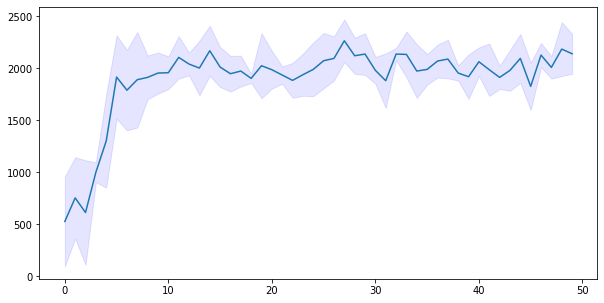

In [9]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

# plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

In [10]:
for t in range(TIME_HORIZON):
    if t % 10 == 0:
        utils.progress_bar(t, TIME_HORIZON)
    super_arm = ts_learner.select_superarm()
    report = environment.round(super_arm)
    ts_learner.update(super_arm.copy(), report)

loading: [========================      ] 80.0%

In [11]:
rewards = ts_learner.history_rewards


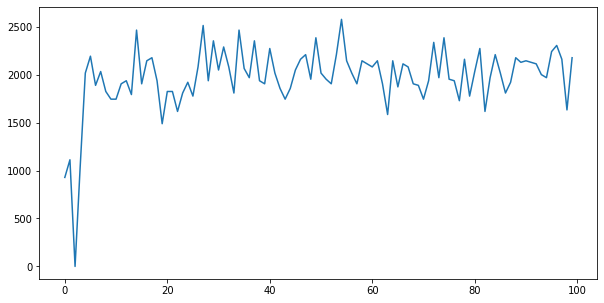

In [12]:
plt.figure(figsize=(10, 5))
plt.plot([_ for _ in range(len(rewards))], rewards)
# plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()


In [14]:
for t in range(TIME_HORIZON):
    if t % 10 == 0:
        utils.progress_bar(t, TIME_HORIZON)
    super_arm = ts_learner.select_superarm()
    report = environment.round(super_arm)
    ts_learner.update(super_arm.copy(), report)

loading: [========================      ] 80.0%

In [15]:
rewards = ts_learner.history_rewards

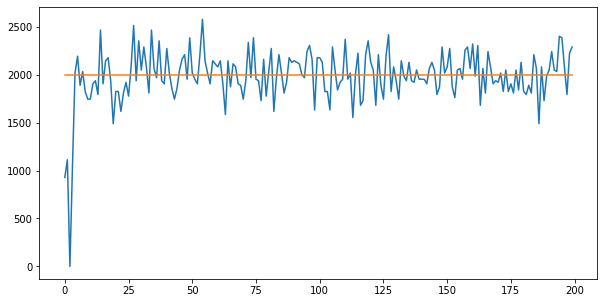

In [16]:
plt.figure(figsize=(10, 5))
plt.plot([_ for _ in range(len(rewards))], rewards)
plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()
